
---

# 📋 **1. PROJECT OVERVIEW**

## **1.1 Introduction**

This project implements a complete **end-to-end machine learning pipeline** for predicting board game ratings. The goal is to build a production-ready system that takes board game attributes as input and returns a predicted rating (Low/Medium/High mapped to 0,1,2).

The project is a **full-stack ML development**:
- **Data Processing**: Raw CSV → cleaned and engineered features
- **Model Development**: Training, validation, and experiment tracking
- **API Development**: RESTful API (Application programming Interface) with FastAPI
- **User Interface (UI)**: Interactive web UI with Gradio
- **Containerization**: Docker packaging for consistency
- **Cloud Deployment**: AWS ECS Fargate (serverless)
- **CI/CD (continuous Integration/continuous deployment)**: Automated deployment with GitHub Actions


-- Reference


-**API**: messenger between the User Interface and the model defining how to ask and what you will get back.

-**CI/CD**: Autmatic pipeline that test and delivers the code update o users automatically whithout doing it manually.  

## **1.2 Dataset**

- **Source:** Board Game dataset
- **Size:** 21,925 games with 46 features
- **Target Variable:** `Rating` (categorical: Low, Medium, High)
- **Mapping:** Low → 0, Medium → 1, High → 2

## **1.3 Features**

The model uses 5 key features identified as most predictive:

| Feature | Description | Data Type |
|--------|-------------|-----------|
| `GameWeight` | Game complexity score (1-5 scale) | Float |
| `BGGId` | BoardGameGeek unique identifier | Integer |
| `NumWant` | Number of users wanting the game | Integer |
| `ComAgeRec` | Community age recommendation | Float |
| `BestPlayers` | Community voted best player count| Integer |

## **1.4 Model**

**Algorithm:** Multiple Linear Regression

Linear regression models the relationship between the target variable `Rating` and the 5 features using the equation:

$$Rating = \beta_0 + \beta_1(GameWeight) + \beta_2(BGGId) + \beta_3(NumWant) + \beta_4(ComAgeRec) + \beta_5(BestPlayers) + \varepsilon$$

Where:
- $\beta_0$ is the intercept
- $\beta_1$ through $\beta_5$ are coefficients for each feature
- $\varepsilon$ is the error term


**Why Linear Regression?**
- Simple and interpretable
- Fast training and inference
- Provides coefficient insights (feature importance)
- Good baseline model for regression tasks

## **1.5 Tech Stack**

| Component | Technology |
|-----------|-----------|
| **Language** | Python 3.11 |
| **API Framework** | FastAPI |
| **UI Framework** | Gradio |
| **ML Library** | scikit-learn |
| **Experiment Tracking** | MLflow |
| **Containerization** | Docker |
| **Cloud Provider** | AWS (ECS Fargate, ECR) |
| **CI/CD** | GitHub Actions |
| **Version Control** | Git |

---



## **Workflow Description:**

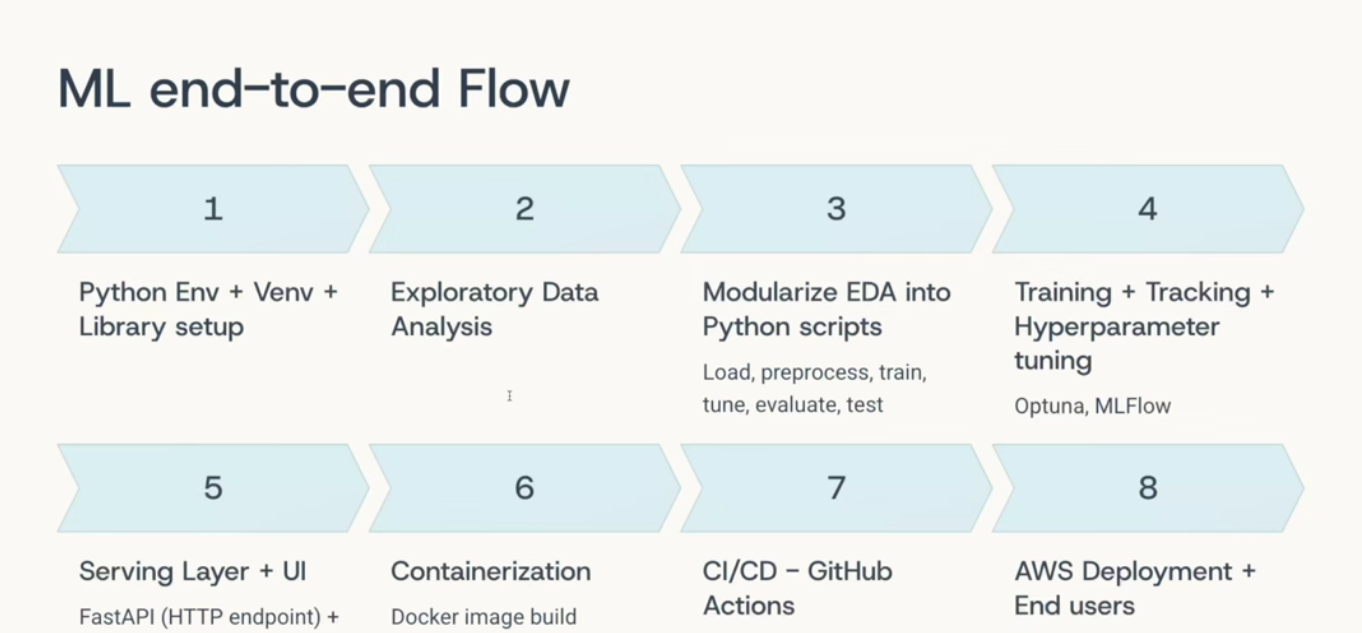

This diagram illustrates the end-to-end pipeline of our project. Starting from environment setup (Phase 1), we progress through exploratory data analysis (Phase 2), modularization of code (Phase 3), model training with hyperparameter tuning (Phase 4), building the serving layer with FastAPI and Gradio (Phase 5), containerization with Docker (Phase 6), establishing CI/CD with GitHub Actions (Phase 7), and finally deploying to AWS for end users (Phase 8).



## **2.1 Folder and File Descriptions**

| Path | Purpose |
|------|---------|
| `.github/workflows/deploy.yml` | GitHub Actions workflow for automated build and deployment |
| `scripts/prepare_processed_data.py` | Main data preprocessing script that loads raw data, applies transformations, and saves processed dataset |
| `scripts/artifacts/` | Stores trained model artifacts (`final_model.pkl` and `feature_columns.pkl`) |
| `src/data/DM1_game_dataset.csv` | Raw dataset (source of truth) |
| `src/data/data_preprocessing.py` | Contains preprocessing functions: outlier capping, imputation, scaling, correlation filtering |
| `src/feature_engineering/feature_engineering.py` | Creates additional features from preprocessed data |
| `src/models/train.py` | Trains LinearRegression model, logs metrics with MLflow, saves artifacts |
| `src/serving/inference.py` | Single source of truth for predictions; loads model and features, prepares input, returns predictions |
| `src/app/main.py` | FastAPI application with Gradio UI mounted at `/ui` and prediction endpoint at `/predict` |
| `dockerfile` | Docker build instructions for containerization |
| `requirements.txt` | Python package dependencies |

---

# 🚀 **3. STEP-BY-STEP EXECUTION GUIDE**

## **Phase 1: Environment Setup**

**Goal:** Create isolated Python environment and install all dependencies.

```bash
# Clone repository
git clone https://github.com/diffodsonwa/Board-game-predictor.git
cd Board-game-predictor

# Create virtual environment
python -m venv .venv

# Activate virtual environment (Linux/Mac)
source .venv/bin/activate

# Activate virtual environment (Windows)
# .venv\Scripts\activate

# Install dependencies
pip install -r requirements.txt

# Verify installation
pip list

## *Phase 2: Data Preparation*
*** Goal: Transform raw CSV data into clean, preprocessed dataset with numeric ratings.

### Run preprocessing pipeline
python scripts/prepare_processed_data.py

## What is performs:

    . Loads raw DM1_game_dataset.csv

    . Converts Rating text → numeric (Low=0, Medium=1, High=2)

    . Caps outliers using IQR method

    . Imputes missing values (mean/median based on skewness)

    . Scales features to [0,1] range using MinMaxScaler

    . Removes highly correlated features (>0.8 correlation)

    . Saves processed data for training

## *Phase 3: Model Training*

Goal: Train Multiple Linear Regression model and save artifacts for inference

### Train model and save artifacts
python src/models/train.py

### Verify artifacts

ls scripts/artifacts/

---> final_model.pkl  feature_columns.pkl

## **Phase 4: Local Testing**

**Goal:** Verify inference pipeline and launch application locally.

**Test inference:**
```bash
python src/serving/test_inference.py

%bash

uvicorn src.app.main:app --reload

Access endpoints:

Interface	URL

Gradio UI	http://127.0.0.1:8000/ui

FastAPI Docs	http://127.0.0.1:8000/docs

API Endpoint	http://127.0.0.1:8000/
predict



**Test API with curl:**

%bash

curl -X POST http://127.0.0.1:8000/predict \
  -H "Content-Type: application/json" \
  -d '{"GameWeight":2.5, "BGGId":1234, "NumWant":50, "ComAgeRec":12, "BestPlayers":4}'


**Expected Response**

{"prediction":2.34}

## *Phase 5: Docker Containerization*

Goal: Package application into portable Docker container.

Dockerfile:

FROM python:3.11-slim

WORKDIR /app

COPY requirements.txt .

RUN pip install --upgrade pip && pip install -r requirements.txt

COPY . .

EXPOSE 8000

CMD ["uvicorn", "src.app.main:app", "--host", "0.0.0.0", "--port", "8000"]

*** Build and Run

%bash

#### Build Docker image
docker build -t diffodsonwa/board-game-predictor:latest -f dockerfile .

### Run container locally
docker run -p 8000:8000 diffodsonwa/board-game-predictor:latest

#### Test container
#### Open: http://127.0.0.1:8000/ui

## **Phase 6: AWS Deployment (Free Tier)**

**Goal:** Deploy containerized application to AWS ECS Fargate.

### **6.1 AWS CLI Configuration**

```bash
# Configure AWS credentials
aws configure
# AWS Access Key ID:     [Your Access Key]
# AWS Secret Access Key: [Your Secret Key]
# Default region:        eu-north-1
# Default output:        json

# Get Account ID
aws sts get-caller-identity
export AWS_ACCOUNT_ID=186014908638



### *6.2 ECR Repository & Image Push*


```bash

# Create repository

aws ecr create-repository --repository-name board-game-predictor --region eu-north-1

# Authenticate Docker
aws ecr get-login-password --region eu-north-1 | docker login --username AWS --password-stdin $AWS_ACCOUNT_ID.dkr.ecr.eu-north-1.amazonaws.com

# Tag and push image
docker tag diffodsonwa/board-game-predictor:latest $AWS_ACCOUNT_ID.dkr.ecr.eu-north-1.amazonaws.com/board-game-predictor:latest
docker push $AWS_ACCOUNT_ID.dkr.ecr.eu-north-1.amazonaws.com/board-game-predictor:latest

### *6.3 IAM Role for ECS*

```bash

# Create task execution role
aws iam create-role --role-name ecsTaskExecutionRole --assume-role-policy-document '{"Version":"2012-10-17","Statement":[{"Effect":"Allow","Principal":{"Service":"ecs-tasks.amazonaws.com"},"Action":"sts:AssumeRole"}]}'

# Attach policy
aws iam attach-role-policy --role-name ecsTaskExecutionRole --policy-arn arn:aws:iam::aws:policy/service-role/AmazonECSTaskExecutionRolePolicy

###*6.4 ECS Cluster*

```bash

aws ecs create-cluster --cluster-name board-game-cluster --region eu-north-1

### **6.5 Task Definition (AWS Console)**

| Field | Value |
|-------|-------|
| **Family** | `board-game-task` |
| **Infrastructure** | AWS Fargate |
| **Task size** | .25 vCPU, .5 GB memory |
| **Container** | `board-game-container` with image from ECR, port `8000` |

### **6.6 Run Task**

| Field | Value |
|-------|-------|
| **Cluster** | `board-game-cluster` |
| **Launch type** | FARGATE |
| **Task definition** | `board-game-task:1` |
| **Security group** | Allow port `8000` from `0.0.0.0/0` |
| **Public IP** | ENABLED |

### **7.1 GitHub Secrets**

Add to `Settings → Secrets and variables → Actions`:

| Secret Name | Value |
|------------|-------|
| `AWS_ACCESS_KEY_ID` | Your AWS access key |
| `AWS_SECRET_ACCESS_KEY` | Your AWS secret key |
| `AWS_ACCOUNT_ID` | `186014908638` |
| `AWS_REGION` | `eu-north-1` |

### **7.2 Trigger Deployment**

```bash
git add .
git commit -m "Update model"
git push origin main


--------------------------

GitHub Actions automatically:

    Builds new Docker image

    Pushes to ECR

    Updates latest tag

## **Phase 8: Clean Up Resources**

**Goal:** Remove all AWS resources to avoid unexpected charges.

```bash
# Stop running task
aws ecs stop-task --cluster board-game-cluster --task [TASK_ARN] --region eu-north-1

# Delete ECS cluster
aws ecs delete-cluster --cluster board-game-cluster --region eu-north-1

# Delete ECR repository
aws ecr delete-repository --repository-name board-game-predictor --force --region eu-north-1

# Delete IAM role
aws iam detach-role-policy --role-name ecsTaskExecutionRole --policy-arn arn:aws:iam::aws:policy/service-role/AmazonECSTaskExecutionRolePolicy
aws iam delete-role --role-name ecsTaskExecutionRole

# 6. PROJECT LINKS

Resource	URL

GitHub Repository	https://github.com/diffodsonwa/Board-game-predictor

Local Gradio UI	http://127.0.0.1:8000/ui

Local FastAPI Docs	http://127.0.0.1:8000/docs

Local API Endpoint	http://127.0.0.1:8000/predict

AWS ECR Repository	186014908638.dkr.ecr.eu-north-1.amazonaws.com/board-game-predictor:latest

AWS ECS Task	Cluster: board-game-cluster / Task: board-game-task:1